# Thesis Analysis - Identifying success factors in online learning by subgroup discovery
### Sonny van Veghel - 1266062

## Structure of this code:
This code is divided into 4 sections, the first one deals with the data importing and formatting, the second section involves EDA, the third section runs subgroup discovery for all feature groups (this is used for some functions in section 4), section 4 runs all results used in the paper. Do note that not all of them are just plotting results, some (hyperparameter tuning/subgroup discovery once) functions do run subgroup discovery again. 

## 1. Import data

In [1]:
import matplotlib
import sd4py as sd #used for subgroup analysis
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import os
import inspect
import sd4py_extra as sde #used for bootstrapping/visualisation
import seaborn as sb #used for plotting 
import matplotlib.pyplot as plt #used for plotting 
import pysubgroup.visualization as psv #used for plotting 

In [57]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [3]:
filepath = 'C:\\Users\\Sonny'

In [4]:
#import activity dataset --> features are activity based
activity_df = pd.read_csv(os.path.join(filepath,'oneRecord_400_new_activity.csv'))

In [5]:
activity_df.shape

(17323, 44)

In [6]:
activity_df.rename(columns = {'Time_JourneyStarted_week':'Week'}, inplace = True)

Different feature groups for duration

In [7]:
start_features = ["Week"]

In [8]:
activity_features = ['TotalNumberOfDays','AvgNumberOfDays','StdDevNumberOfDays']

In [9]:
course_features = ["LengthCourse","Goal","InstructionWizard","OpenTask","Questionnaire","TextualExplanation","VideoAssignment",
                       "Vrt","target"]

In [10]:
action_features = ["target","AudioPaused","AudioStarted","BookmarkCreated","BookmarkViewed","ElementDone","ElementOpened","ElementInProgress",
                       "JourneyStarted","JourneyVisited","JourneyAssignedToGoal","StuckButtonUsed","SupporterInvited","SupporterLinkOpened",
                       "ToggleTranscript","VideoPaused","VideoStarted"]

In [11]:
action_features_nt = ["AudioPaused","AudioStarted","BookmarkCreated","BookmarkViewed","ElementDone","ElementOpened","ElementInProgress",
                       "JourneyStarted","JourneyVisited","JourneyAssignedToGoal","StuckButtonUsed","SupporterInvited","SupporterLinkOpened",
                       "ToggleTranscript","VideoPaused","VideoStarted"]

In [12]:
all_ft = [start_features, activity_features, course_features, action_features]

# 1. Construct feature groups

##### Make different feature groups

1. Activity + start

In [13]:
course = course_features

In [14]:
action = action_features

In [15]:
activ = activity_features +['target']

In [16]:
start_activ = activity_features + start_features +['target']

2. Adding start only

In [17]:
act_start = action_features + start_features 

In [18]:
course_start = course_features + start_features

3. Adding activity only

In [19]:
act_activ = activity_features + action_features 

In [20]:
course_activ =  activity_features + course_features 

4. Course and action

In [21]:
course_act = course_features + action_features

5. Adding activity + start

In [22]:
act_activ_start = activity_features + action_features + start_features

In [23]:
course_activ_start = activity_features + course_features + start_features

In [24]:
start_course_act = course_features + start_features + action_features

In [25]:
course_activ_act = course_features + activity_features + action_features

6. Total: activity + start + course + action

In [26]:
total =  start_features + activity_features + course_features + action_features_nt

##### All groups in one list

In [27]:
all_feature_groups = [action,activ,course,start_activ, act_start, course_start, act_activ, course_activ, course_act, act_activ_start,
                     course_activ_start, start_course_act, course_activ_act, total]

In [28]:
all_ft_gr_nod = []

for feature_gr in all_feature_groups:
    mylist = list(dict.fromkeys(feature_gr))
    all_ft_gr_nod.append(mylist)

# 2. Exploratory Data Analysis

C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\206933138.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  st_only = activity_df[activity_df.columns & st_no_tgt]


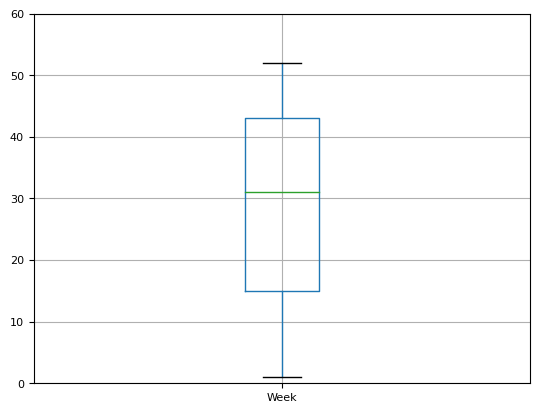

In [29]:
st_no_tgt = ["Week"]
st_only = activity_df[activity_df.columns & st_no_tgt]
box_plot_st = st_only.boxplot(fontsize=8)
plt.ylim(0, 60)
plt.yticks(np.arange(0, 65, 10))
plt.show()

C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\334814568.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  course_only = activity_df[activity_df.columns & cs_no_tgt]


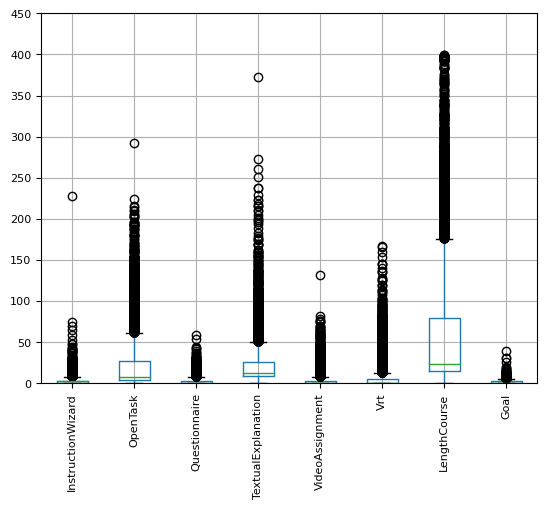

In [30]:
cs_no_tgt = ["LengthCourse","Goal","InstructionWizard","OpenTask","Questionnaire","TextualExplanation","VideoAssignment","Vrt"]
course_only = activity_df[activity_df.columns & cs_no_tgt]
box_plot_cs = course_only.boxplot(rot=90, fontsize=8)
plt.ylim(0, 450)
plt.yticks(np.arange(0, 500, 50))
plt.show()

C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\1138270500.py:4: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  as_only = activity_df[activity_df.columns & as_no_tgt]


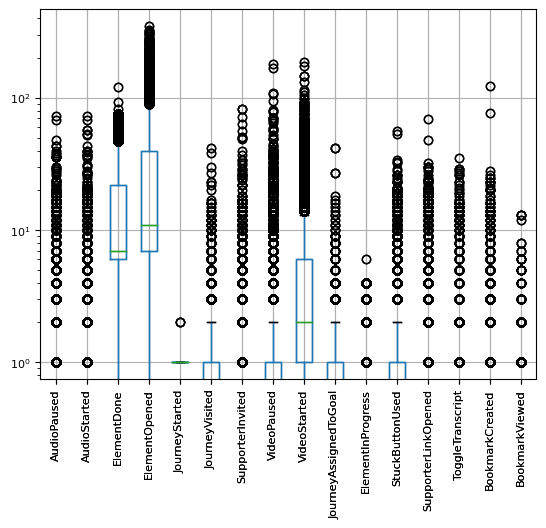

In [32]:
as_no_tgt = ["AudioPaused","AudioStarted","BookmarkCreated","BookmarkViewed","ElementDone","ElementOpened","ElementInProgress",
                       "JourneyStarted","JourneyVisited","JourneyAssignedToGoal","StuckButtonUsed","SupporterInvited","SupporterLinkOpened",
                       "ToggleTranscript","VideoPaused","VideoStarted"]
as_only = activity_df[activity_df.columns & as_no_tgt]
box_plot_as = as_only.boxplot(rot=90, fontsize=8)
plt.show()
#plt.ylim(0, 400)
#plt.yticks(np.arange(0, 450, 50))

C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\401330919.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  ac_only = activity_df[activity_df.columns & ac_no_tgt]


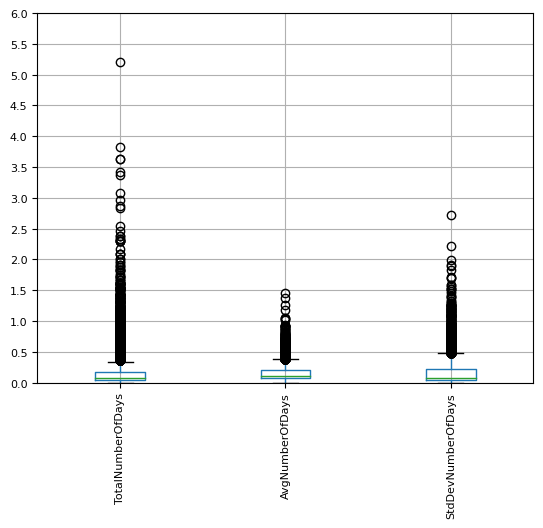

In [33]:
ac_no_tgt = ['TotalNumberOfDays','AvgNumberOfDays','StdDevNumberOfDays']
ac_only = activity_df[activity_df.columns & ac_no_tgt]
box_plot_ac = ac_only.boxplot(rot=90, fontsize=8)
plt.ylim(0, 6)
plt.yticks(np.arange(0, 6.5, 0.5))
plt.show()

In [34]:
all_no_tgt = ['Week','TotalNumberOfDays','AvgNumberOfDays','StdDevNumberOfDays', "LengthCourse","Goal","InstructionWizard","OpenTask","Questionnaire","TextualExplanation","VideoAssignment",
                       "Vrt","AudioPaused","AudioStarted","BookmarkCreated","BookmarkViewed","ElementDone","ElementOpened","ElementInProgress",
                       "JourneyStarted","JourneyVisited","JourneyAssignedToGoal","StuckButtonUsed","SupporterInvited","SupporterLinkOpened",
                       "ToggleTranscript","VideoPaused","VideoStarted"]

C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\2933580851.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  all_only = activity_df[activity_df.columns & all_no_tgt]


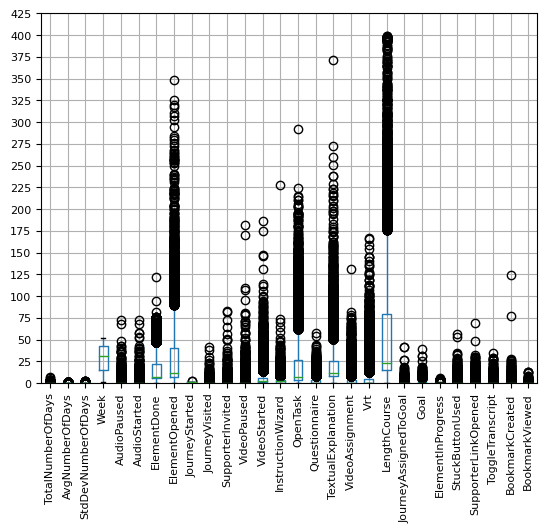

In [35]:
all_only = activity_df[activity_df.columns & all_no_tgt]
box_plot_all = all_only.boxplot(rot=90, fontsize=8)
#plt.semilogy()
plt.ylim(0, 400)
plt.yticks(np.arange(0, 450, 25))
plt.show()

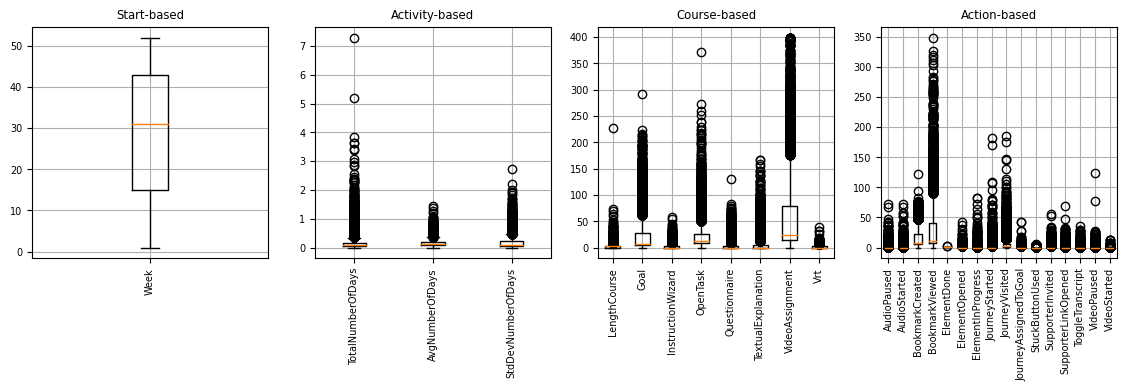

In [43]:
#
fig = plt.figure(figsize=(14,3))
 #set the font style created

ax1 = fig.add_subplot(141)
ax1.title.set_text('Start-based') #bold = ax1.set_title('Start based', fontweight="bold")
ax2 = fig.add_subplot(142)
ax2.title.set_text('Activity-based')
ax3 = fig.add_subplot(143)
ax3.title.set_text('Course-based')
ax4 = fig.add_subplot(144)
ax4.title.set_text('Action-based')

ax1.boxplot(x=st_only,labels=st_no_tgt)
plt.setp(ax1.get_xticklabels(), rotation=90)
ax1.grid(True)

ax2.boxplot(x=ac_only,labels=ac_no_tgt)
plt.setp(ax2.get_xticklabels(), rotation=90)
ax2.grid(True)

ax3.boxplot(x=course_only,labels=cs_no_tgt)
plt.setp(ax3.get_xticklabels(), rotation=90)
ax3.grid(True)

ax4.boxplot(x=as_only,labels=as_no_tgt)
plt.setp(ax4.get_xticklabels(), rotation=90)
ax4.grid(True)

#sns.boxplot(x="d",y="value",df= ,ax=ax1)
#plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.4)

#fig.subplots_adjust(wspace=0.25)
plt.savefig("outliers.pdf", bbox_inches="tight", dpi=1200)
plt.show()

## Barplot target variable

In [58]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

In [62]:
plt.figure(figsize=(7,5))
ax = sb.countplot('target',data=activity_df)
plt.xlabel('User Completion', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title("Distribution of the target variable", fontweight='bold')
plt.xticks(np.arange(2), ['Course not completed', 'Course completed'])
without_hue(ax,activity_df.target)
plt.savefig("target_distribution.png", dpi=1200)

C:\Users\Sonny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# 3. Discover all subgroups

## 3.1 Make total function:

In [68]:
#set seed
np.random.seed(1984)

In [69]:
def total_function_allf(featurelist,rela=None):
    savelist = []
    for features in featurelist:
        
        #'' Function that takes feature group as input
        #'' And returns corresponding cf data + interestingness columns    
        subset = activity_df[activity_df.columns & features]
        #1. Make subgroups:
        #convert to boolean for subgroup discovery purposes
        subset.target = subset.target.astype('bool')
        
        if rela == None:
            subgroups_subset = sd.discover_subgroups(subset,
                                                 target="target",
                                                 target_value=True,
                                                 included_attributes=features,
                                                 method="sdmap",
                                                 nbins=5,
                                                 minsize = 1000,
                                                 k =10,
                                                 qf = "wracc",
                                                 max_selectors=2) #postfilter = 'relevancy'
        else:
            subgroups_subset = sd.discover_subgroups(subset,
                                                 target="target",
                                                 target_value=True,
                                                 included_attributes=features,
                                                 method="sdmap",
                                                 nbins=5,
                                                 minsize = 1000,
                                                 k =10,
                                                 qf = "wracc",
                                                 max_selectors=2,
                                                 filter_irrelevant= True,
                                                 postfilter = rela) #postfilter = 'relevancy'
            
        #2: Make CI
        cf = sde.confidence_intervals(subgroups_subset,subset)
        cf_results = cf[0]
        cf_values = cf_results.values()
        cf_labels = cf_results.keys()
        #cf_data = [cf_values,cf_labels]

        #3: Interesting columns 
        #This is for one column
        int_list = []
        for i in range(len(subgroups_subset)):
            #ic = sde.find_interesting_columns(subgroups_subset[i],subset, columns_to_ignore=['Week','AvgNumberOfDays'])
            ic = sde.find_interesting_columns(subgroups_subset[i],subset)
            #Take mean for all columns --> says more about overal interestingness
            ic_dic = ic[0]
            #print(ic_dic)
            val = list(ic_dic.values())
            int_list.append(val)
        
        data = np.array(int_list)
        #np.array of avg values
        tot_intlist = np.average(data, axis=0)
        #make dict
        avg_dict = {}
        for A, B in zip(list(ic_dic.keys()), tot_intlist):
            avg_dict[A] = B
        
        #4: save info per run
        savelist.append([cf_values,cf_labels,avg_dict,subgroups_subset,subset])
    
    return savelist

In [70]:
all_output = total_function_allf(all_ft_gr_nod,'relevancy')

C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\666706626.py:7: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  subset = activity_df[activity_df.columns & features]
C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\666706626.py:7: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  subset = activity_df[activity_df.columns & features]
C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\666706626.py:7: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  subset = activity_df[activity_df.columns & features]
C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\666706626.py:7: FutureWarning: I

## 3.2 Assign to groups

In [71]:
action_res = all_output[0]

In [72]:
activ_res = all_output[1]

In [73]:
course_res = all_output[2]

In [74]:
start_activity_res = all_output[3]

In [75]:
action_start_res = all_output[4]

In [76]:
course_start_res = all_output[5]

In [77]:
action_activity_res = all_output[6]

In [78]:
course_activity_res = all_output[7]

In [79]:
course_action_res = all_output[8]

In [80]:
action_activity_start_res = all_output[9]

In [81]:
course_activity_start_res = all_output[10]

In [82]:
start_course_action_res = all_output[11]

In [83]:
course_activity_action_res = all_output[12]

In [84]:
total_res = all_output[13]

# 4: Results: plots + subgroups

##  4.1 hyperparameter tuning

In [90]:
def hyper_tuning(values,alg,featuregr):
    
    postvalues = []
    
    feature_labels = label_list_t1 + label_list_t2 + label_list_t3

    for idx,ft in enumerate(featuregr):

        for i in values:
            subset = activity_df[activity_df.columns & ft]
                #1. Make subgroups:
                #convert to boolean for subgroup discovery purposes
            subset.target = subset.target.astype('bool')
            subgroups_sd = sd.discover_subgroups(subset,
                                                      target="target",
                                                      target_value=True,
                                                      included_attributes=ft,
                                                      method=alg,
                                                      nbins=5,
                                                      k =10,
                                                      qf = i,
                                                      max_selectors=2,
                                                      minsize = 1000,
                                                      filter_irrelevant= True,
                                                      postfilter = 'relevancy').to_df()#'sig_improve_set works ok', #sig_improve_set
                                                     # postfilter_param=i).to_df()

            target = round(subgroups_sd['target_evaluation'].mean(),2)
            size = round(subgroups_sd['size'].mean())
            quality = round(subgroups_sd['quality'].mean(),2)
            length = len(subgroups_sd)
            if i == 'wracc':
                postvalues.append([feature_labels[idx],i,target,size,quality])
            else:
                postvalues.append([" ",i,target,size,quality])
                
    return postvalues

In [91]:
postvalues_qf = hyper_tuning(["wracc","lift","ps"],"sdmap",all_feature_groups)

C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\2800883591.py:10: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  subset = activity_df[activity_df.columns & ft]
C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\2800883591.py:10: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  subset = activity_df[activity_df.columns & ft]
C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\2800883591.py:10: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  subset = activity_df[activity_df.columns & ft]
C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\2800883591.py:10: FutureWarning: Index.__and

In [92]:
postvalues_qf

[['Action-based', 'wracc', 0.97, 2481, 0.03],
 [' ', 'lift', 0.97, 2098, 1.24],
 [' ', 'ps', 0.97, 2481, 457.15],
 ['Activity-based', 'wracc', 0.92, 1692, 0.01],
 [' ', 'lift', 0.83, 10715, 1.06],
 [' ', 'ps', 0.92, 1692, 237.44],
 ['Course-based', 'wracc', 0.94, 2141, 0.02],
 [' ', 'lift', 0.97, 1237, 1.23],
 [' ', 'ps', 0.94, 2141, 330.13],
 ['Activity-based & Start-based', 'wracc', 0.95, 2643, 0.03],
 [' ', 'lift', 0.95, 2643, 1.21],
 [' ', 'ps', 0.95, 2643, 442.73],
 ['Action-based & Start-based', 'wracc', 0.96, 3046, 0.03],
 [' ', 'lift', 0.97, 2233, 1.24],
 [' ', 'ps', 0.96, 3046, 550.61],
 ['Course-based & Start-based', 'wracc', 0.96, 3160, 0.03],
 [' ', 'lift', 0.97, 2117, 1.24],
 [' ', 'ps', 0.96, 3160, 553.17],
 ['Activity-based & Action-based', 'wracc', 0.97, 2719, 0.03],
 [' ', 'lift', 0.98, 1723, 1.25],
 [' ', 'ps', 0.97, 2719, 497.48],
 ['Activity-based & Course-based', 'wracc', 0.93, 2600, 0.02],
 [' ', 'lift', 0.97, 1201, 1.24],
 [' ', 'ps', 0.93, 2600, 377.99],
 ['Acti

In [74]:
postvalues_df = pd.DataFrame(postvalues_qf, columns = ['Feature Group','QF','Accuracy','Size','Quality'])

In [75]:
print(postvalues_df.to_latex(index=False))

\begin{tabular}{llrrr}
\toprule
                               Feature Group &    QF &  Accuracy &  Size &  Quality \\
\midrule
                                Action-based & wracc &      0.97 &  2481 &     0.03 \\
                                             &  lift &      0.97 &  2098 &     1.24 \\
                                             &    ps &      0.97 &  2481 &   457.15 \\
                              Activity-based & wracc &      0.92 &  1692 &     0.01 \\
                                             &  lift &      0.83 & 10715 &     1.06 \\
                                             &    ps &      0.92 &  1692 &   237.44 \\
                                Course-based & wracc &      0.94 &  2141 &     0.02 \\
                                             &  lift &      0.97 &  1237 &     1.23 \\
                                             &    ps &      0.94 &  2141 &   330.13 \\
                Activity-based \& Start-based & wracc &      0.95 &  2643 &     0.03 \\
 

C:\Users\Sonny\AppData\Local\Temp\ipykernel_20940\241797436.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(postvalues_df.to_latex(index=False))


## 4.2 Bootstrapping plots

In [86]:
label_list_t1 = ["Action-based","Activity-based","Course-based","Activity-based & Start-based","Action-based & Start-based"]
label_list_t2 = ["Course-based & Start-based", "Activity-based & Action-based","Activity-based & Course-based",
                 "Action-based & Course-based","Activity-based & Action-based & Start-based"]
label_list_t3 = [  "Activity-based & Course-based & Start-based", "Action-based & Course-based & Start-based",
                 "Activity-based & Action-based & Course-based", "Total-based"]

In [87]:
input_all_t1 = [action_res,activ_res,course_res,start_activity_res,action_start_res]

In [88]:
input_all_t2 = [course_start_res,action_activity_res,course_activity_res, course_action_res, action_activity_start_res]

In [89]:
input_all_t3 = [course_activity_start_res,start_course_action_res,course_activity_action_res,total_res]

In [228]:
#plt.style.use(matplotlib.get_data_path()+'/stylelib/apa.mplstyle') 

In [264]:
def ci_plotter_thr(data,label,save,height,num,B):
    
    fig, axs = plt.subplots(num,1, figsize=(4, height))
    fig.subplots_adjust(hspace = .5)
    
    font = {'family' : 'sans-serif',
           'weight' : 'bold',
           'size'   : 7}         
    

    matplotlib.rc('font', **font) #set the font style created
    #plt.rcParams["font.weight"] = "bold"
    axs = axs.ravel()
    for idm,dt in enumerate(data):
        bootstrapping_results_list = dt[0]
        labels = dt[1]

        averages = np.stack([np.array(x)[:,1] for x in bootstrapping_results_list])

        for idx, row in enumerate(averages): 
            averages[idx][np.isnan(row)] = row[~np.isnan(row)].mean() # remove nan

        widths = [np.array(x)[:,0].mean() for x in bootstrapping_results_list]
        widths = 0.9 * np.array(widths) / np.max(widths)  ## Box thickness relative to the maximum shown. Adjusted by 0.9 to avoid overlap

        axs[idm].boxplot(averages.T, vert=False, widths=widths, labels=labels)
        axs[idm].set_title(f"{label[idm]} (B{B[idm]})",fontweight="bold")
        #axs[idm].title.set_text(f"{label[idm]} (B{B[idm]})",fontweight="bold")
        axs[idm].set_xlabel("Mean Target Value",fontweight="bold")

        #only last one:
        #if idm == len(label)-1:
        #    axs[idm].set_xlabel("Mean Target Value")
        #else:
        #    continue        
    plt.savefig(f"{save}.png", bbox_inches="tight", dpi=1200)
    return 


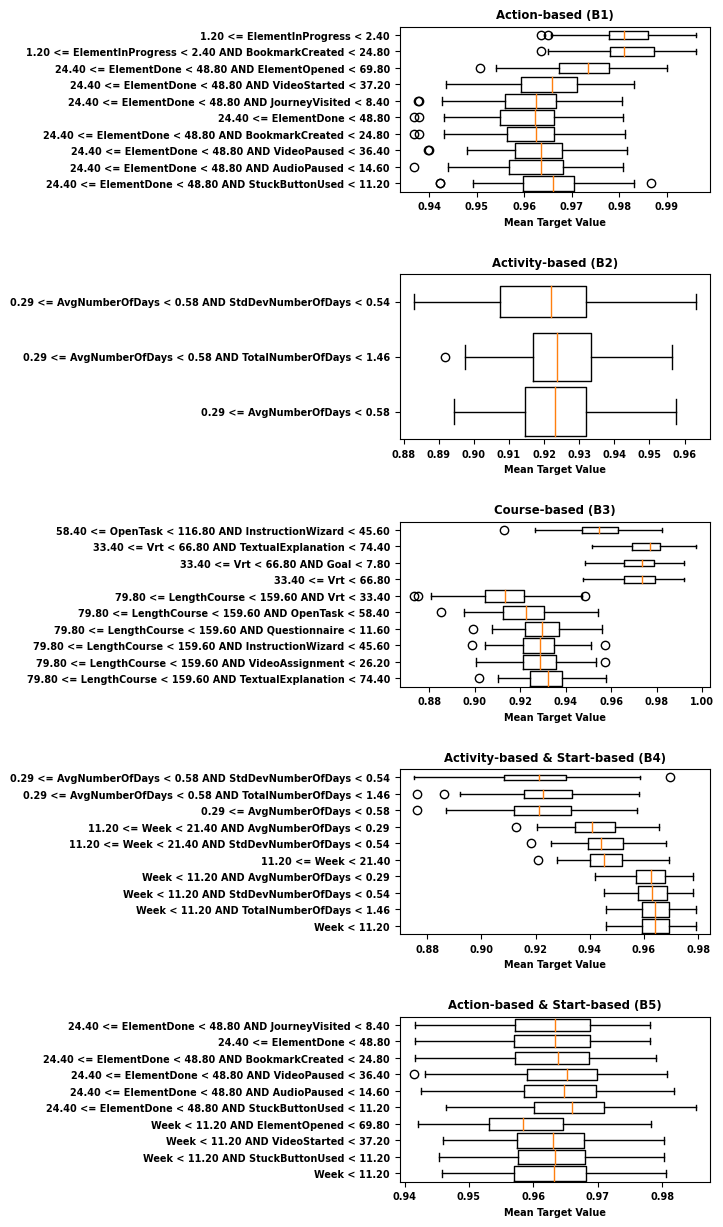

In [265]:
ci_plotter_thr(input_all_t1,label_list_t1,"ci_three_one",15,5,[1,2,3,4,5]) 

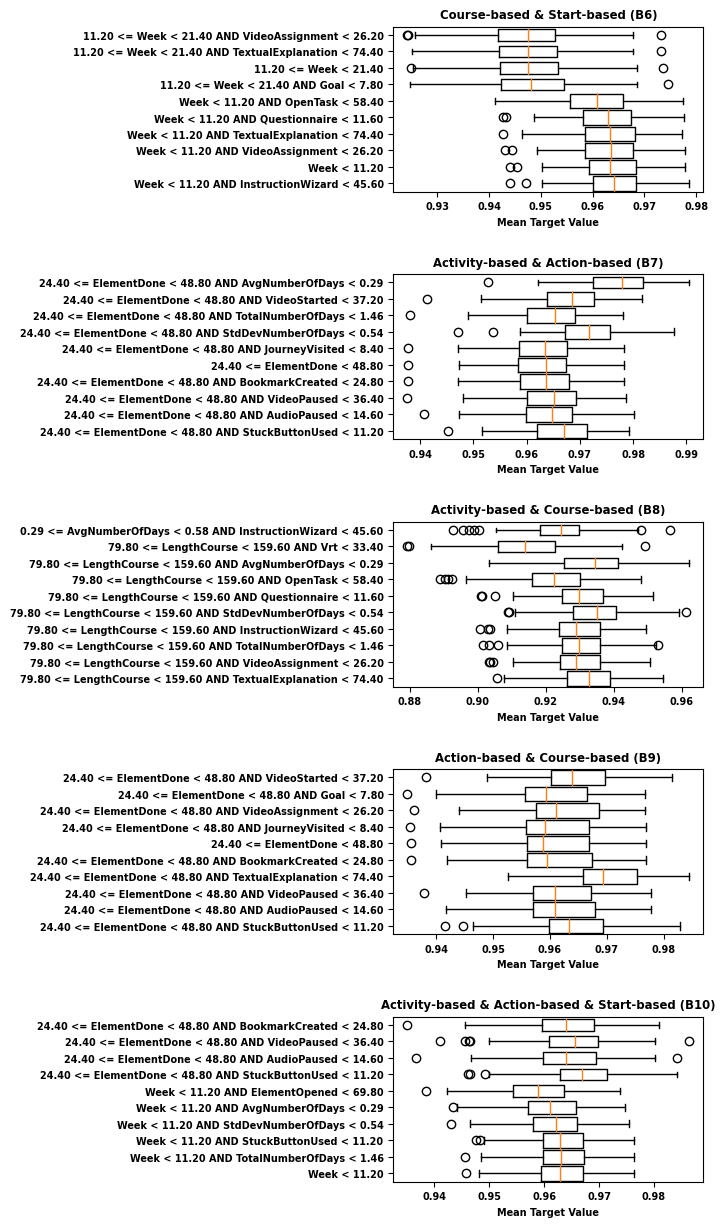

In [266]:
ci_plotter_thr(input_all_t2,label_list_t2,"ci_three_two",15,5,[6,7,8,9,10]) 

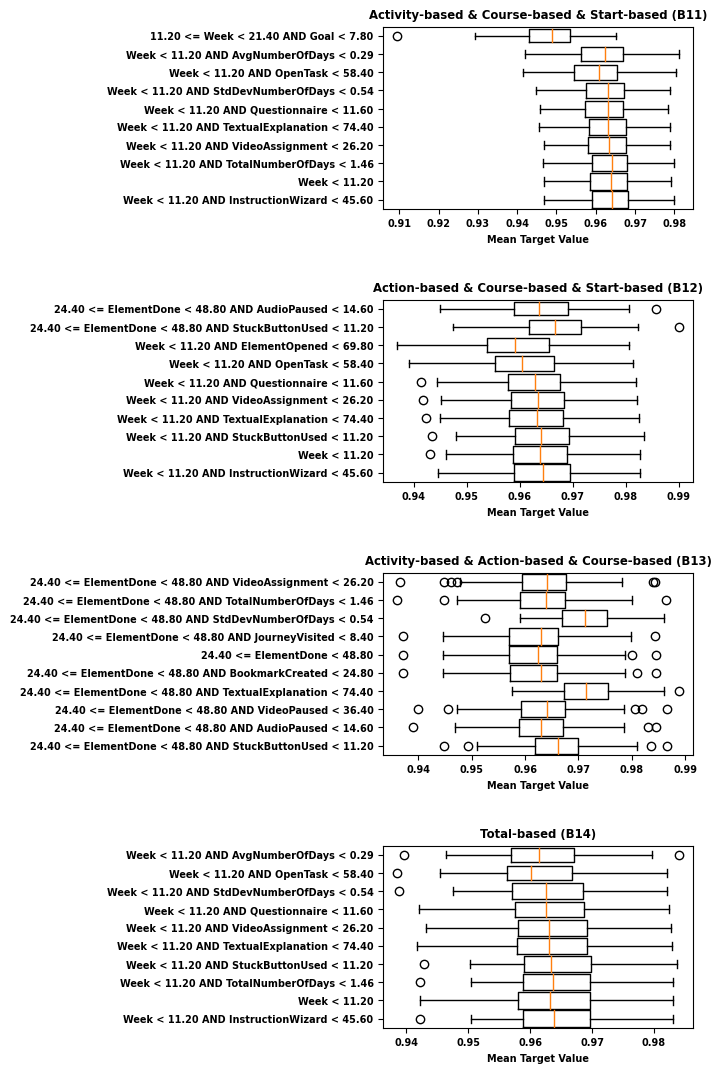

In [267]:
ci_plotter_thr(input_all_t3,label_list_t3,"ci_three_three",13,4,[11,12,13,14]) 

## 4.3 Subgroup discovery once

In [97]:
def subgroup_once(features):
    test_list = ["sdmap","beam"]
    
    feature_labels = label_list_t1 + label_list_t2 + label_list_t3
    
    all_cs = []
    for idt, feature_gr in enumerate(features):

        subset = activity_df[activity_df.columns & feature_gr]
        sg_list = []
        for i in test_list:
            subset.target = subset.target.astype('bool')
            subgroups_subset = sd.discover_subgroups(subset,
                                                     target="target",
                                                     target_value=True,
                                                     included_attributes=feature_gr,
                                                     method=i,
                                                     nbins=5,
                                                     k =10,
                                                     minsize=1000,
                                                     qf = "wracc",
                                                     max_selectors=2,
                                                     filter_irrelevant = True,
                                                     postfilter='relevancy').to_df()
            sg_list.append(subgroups_subset)
            
        smin = round(np.min(sg_list[0]['size']))
        smax = round(np.max(sg_list[0]['size']))
        qmin = round(np.min(sg_list[0]['quality']),4)
        qmax = round(np.max(sg_list[0]['quality']),4)
        td = [feature_labels[idt],smin,smax,qmin,qmax]
        
        #all_cs.append(mean_cs)
        all_cs.append(td)
        
        
    return all_cs            

In [98]:
ft = subgroup_once(all_feature_groups)

C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\1673863575.py:9: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  subset = activity_df[activity_df.columns & feature_gr]
C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\1673863575.py:9: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  subset = activity_df[activity_df.columns & feature_gr]
C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\1673863575.py:9: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  subset = activity_df[activity_df.columns & feature_gr]
C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\1673863575.py:9: Future

In [270]:
ft

[['Action-based', 1604, 2839, 0.0183, 0.0298],
 ['Activity-based', 1220, 1955, 0.0097, 0.0158],
 ['Course-based', 1222, 2933, 0.0133, 0.025],
 ['Activity-based & Start-based', 1220, 3522, 0.0097, 0.0369],
 ['Action-based & Start-based', 2811, 3522, 0.0294, 0.0369],
 ['Course-based & Start-based', 2752, 3522, 0.0261, 0.0369],
 ['Activity-based & Action-based', 2028, 2839, 0.0226, 0.0298],
 ['Activity-based & Course-based', 1952, 2933, 0.0159, 0.025],
 ['Action-based & Course-based', 2693, 2839, 0.0286, 0.0298],
 ['Activity-based & Action-based & Start-based', 2811, 3522, 0.0295, 0.0369],
 ['Activity-based & Course-based & Start-based', 2791, 3522, 0.0266, 0.0369],
 ['Action-based & Course-based & Start-based', 2811, 3522, 0.0296, 0.0369],
 ['Activity-based & Action-based & Course-based', 2694, 2839, 0.0291, 0.0298],
 ['Total-based', 3028, 3522, 0.0314, 0.0369]]

In [271]:
ft_df = pd.DataFrame(ft, columns = ['Feature Group', 'Min Size', 'Max Size', 'Min WRacc','Max WRacc'])

In [273]:
print(ft_df.to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
                               Feature Group &  Min Size &  Max Size &  Min WRacc &  Max WRacc \\
\midrule
                                Action-based &      1604 &      2839 &     0.0183 &     0.0298 \\
                              Activity-based &      1220 &      1955 &     0.0097 &     0.0158 \\
                                Course-based &      1222 &      2933 &     0.0133 &     0.0250 \\
                Activity-based \& Start-based &      1220 &      3522 &     0.0097 &     0.0369 \\
                  Action-based \& Start-based &      2811 &      3522 &     0.0294 &     0.0369 \\
                  Course-based \& Start-based &      2752 &      3522 &     0.0261 &     0.0369 \\
               Activity-based \& Action-based &      2028 &      2839 &     0.0226 &     0.0298 \\
               Activity-based \& Course-based &      1952 &      2933 &     0.0159 &     0.0250 \\
                 Action-based \& Course-based &      2693 &      2839 & 

C:\Users\Sonny\AppData\Local\Temp\ipykernel_984\920007996.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ft_df.to_latex(index=False))


## 4.4 Heatmap

In [135]:
#seaborn
import seaborn as sb

In [140]:
tot_dict = {'Action-based':action_res[2],'Activity-based':activ_res[2],'Course-based':course_res[2], 'Activity-based & Start-based':start_activity_res[2],'Action-based & Start-based':action_start_res[2],
            'Course-based & Start-based':course_start_res[2],'Action-based & Activity-based':action_activity_res[2],'Activity-based & Course-based':course_activity_res[2],
            'Action-based & Course-based':course_action_res[2],'Action-based & Activity-based & Start-based':action_activity_start_res[2],
            'Activity-based & Course-based & Start-based':course_activity_start_res[2],
            'Action-based & Course-based & Start-based':start_course_action_res[2],'Activity-based & Cours-basede & Action-based':course_activity_action_res[2],
            'Total-based':total_res[2]}

In [141]:
sb.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})

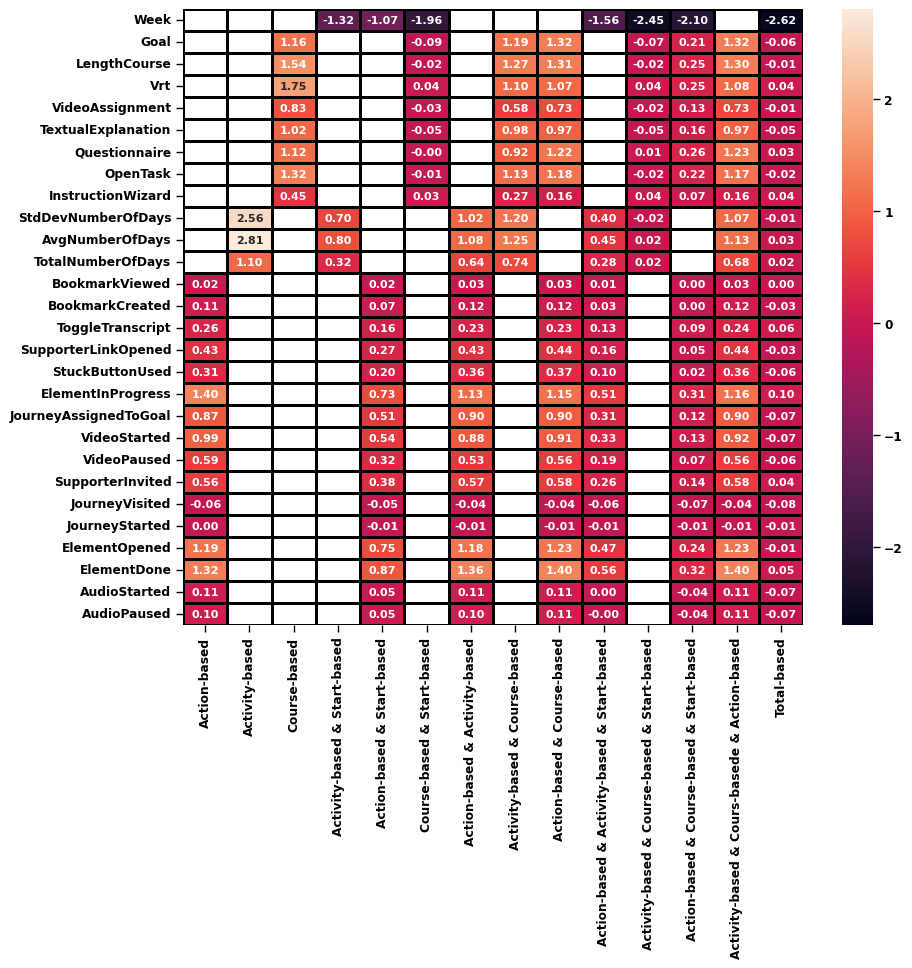

In [216]:
fig, ax = plt.subplots(figsize=(10,8))
prob_matrix_tot = pd.DataFrame(tot_dict)#.fillna(0)
sb.heatmap(prob_matrix_tot,mask=prob_matrix_tot.isnull(),annot=True,vmin=-2.7,
           linewidths=1, fmt='.2f', linecolor='black')
ax.set_ylim([0,28])
plt.savefig("total_heatmap.pdf", bbox_inches="tight", dpi=1200)

## 4.5 Jaccard visualisations (network graphs)

In [161]:
act_jac = list(action_res[3])
course_jac = list(course_res[3])
activ_jac = list(activ_res[3])
tot_jac = list(total_res[3])
total_jac = act_jac + course_jac + activ_jac + tot_jac

In [276]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D 
import networkx as nx
def jaccard_total(tlist,k):

    data = total_res[4]
        
    subgroups = tlist
    

    labels = [str(sg) for sg in subgroups]

    adjacency = np.zeros((len(subgroups), len(subgroups)))
    
    for idx1, subgroup1 in enumerate(subgroups):
        
        for idx2, subgroup2 in enumerate(subgroups):

            if idx1 < idx2:
                indices1 = subgroup1.get_indices(data)
                indices2 = subgroup2.get_indices(data)
                
                adjacency[idx1, idx2] = indices1.intersection(indices2).size / indices1.union(indices2).size
                
    G = nx.from_numpy_matrix(adjacency * (adjacency > 0))

    G = nx.relabel_nodes(G, mapping={idx:sg for idx, sg in enumerate(labels)})

    #pos = nx.spring_layout(G, seed=10,scale=0.5,k=0.05) # seed so the results are consistent each time
    pos = nx.spring_layout(G, seed=10,scale=0.5,k=k) # k was .15/.4/.7

    #Cluster groups
    #color_map = ['blue'] * 6 + ['red'] * 10 + ['yellow'] * 8 + ['green'] * 3 #only using relevancy filter = True
    
    color_map = ['blue'] * 10 + ['red'] * 10 + ['yellow'] * 3 + ['green'] * 10
            
   # nx.draw(G, node_color=color_map, with_labels=True)
    nx.draw_networkx_nodes(G, pos, node_size=130, alpha=0.3,node_color=color_map) #node size was 150

    # edges
    nx.draw_networkx_edges(
        G, pos, alpha=0.2,edge_color='grey', #'r' works pretty well
        width = [4 * x for x in nx.get_edge_attributes(G,'weight').values()]
    )
    #node_labels = {i: i[:16] for i in G.nodes}
    # labels
    
    
    #fig = plt.figure(1, figsize=(200, 80), dpi=1200)
    
    #node_labels = {i: i[:22]+'...' for i in G.nodes}
    
    label = {}
    for sent in G.nodes:
        if 'Total' in sent:
            word = sent.split(" ")
            f = ' '.join([x[:5] for x in word])
            label[sent]=f
        else:
            word = sent.split(" ")
            f = ' '.join([x[:4] for x in word])
            label[sent]=f
    
    nx.draw_networkx_labels(G, pos, font_size=5, labels = label, font_family="sans-serif",font_weight="bold")
    
    plt.rcParams["figure.figsize"] = (16,8)
    plt.title("Jaccard Similarity between feature groups",fontweight="bold",fontsize='9') #family='sans-serif',
    
    
    line1 = Line2D([], [], color="white", marker='o',markersize=12, markerfacecolor="yellow",alpha=0.5)
    line2 = Line2D([], [], color="white", marker='o',markersize=12, markerfacecolor="red",alpha=0.5)
    line3 = Line2D([], [], color="white", marker='o', markersize=12, markerfacecolor="blue",alpha=0.5)
    line4 = Line2D([], [], color="white", marker='o', markersize=12, markerfacecolor="green",alpha=0.5)
    
    legend = plt.legend((line1, line2, line3, line4), ('Activity-based', 'Course-based', 'Action-based', 'Total-based'), 
               numpoints=1, loc=4)  #title="Feature Group:"
     
    legend.get_title().set_fontsize('10') #legend 'Title' fontsize
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='9')
    plt.setp(legend.texts, family='sans-serif')
    
    #set framewidth and color
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(1)
    #plt.tight_layout() #--> makes figure bigger thus showing also number of stdev
    plt.savefig(f"total_clusters{str(k)}.pdf", dpi=1200, bbox_inches='tight') #png for bigger picture
    
    return #adjacency  #G Returning G allows for pyvis visualisation

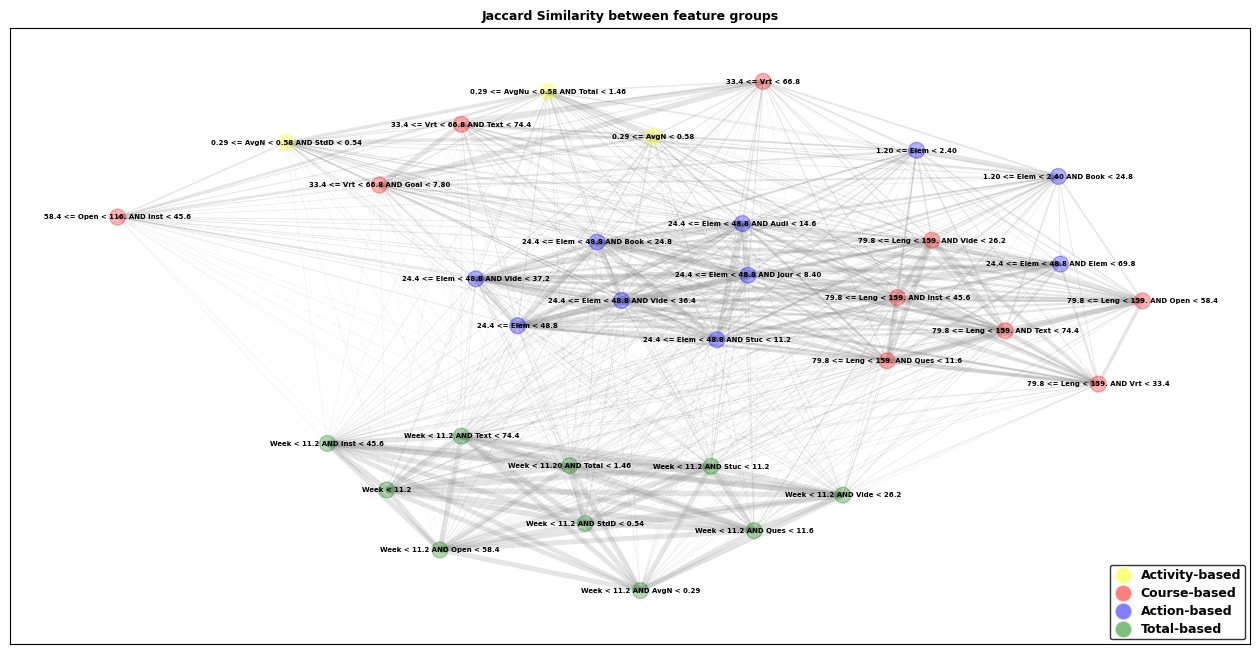

In [277]:
G = jaccard_total(total_jac,0.25)

## 4.6 Cosine calculation

In [99]:
from sklearn.metrics.pairwise import cosine_similarity

def cosine(features):
    test_list = ["sdmap","beam"]
    
    feature_labels = label_list_t1 + label_list_t2 + label_list_t3
    
    all_cs = []
    for idt, feature_gr in enumerate(features):

        subset = activity_df[activity_df.columns & feature_gr]
        sg_list = []
        for i in test_list:
            subset.target = subset.target.astype('bool')
            subgroups_subset = sd.discover_subgroups(subset,
                                                     target="target",
                                                     target_value=True,
                                                     included_attributes=feature_gr,
                                                     method=i,
                                                     nbins=5,
                                                     k =10,
                                                     minsize=1000,
                                                     qf = "wracc",
                                                     max_selectors=2,
                                                     filter_irrelevant = True,
                                                     postfilter='relevancy').to_df()
            sg_list.append(subgroups_subset)
            

        cs = cosine_similarity(sg_list[0].iloc[:,1:4],sg_list[1].iloc[:,1:4])
        mean_cs = np.mean(cs)
        td = [feature_labels[idt],mean_cs]
        
        #all_cs.append(mean_cs)
        all_cs.append(td)
        
        
    return all_cs            

In [100]:
cos_res = cosine(all_feature_groups)

C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\2203919346.py:11: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  subset = activity_df[activity_df.columns & feature_gr]
C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\2203919346.py:11: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  subset = activity_df[activity_df.columns & feature_gr]
C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\2203919346.py:11: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  subset = activity_df[activity_df.columns & feature_gr]
C:\Users\Sonny\AppData\Local\Temp\ipykernel_16708\2203919346.py:11: Fu

In [101]:
cos_res

[['Action-based', 0.9999999879433342],
 ['Activity-based', 0.9999999506642309],
 ['Course-based', 0.9999999587858988],
 ['Activity-based & Start-based', 0.9999999804889609],
 ['Action-based & Start-based', 0.9999999991651525],
 ['Course-based & Start-based', 0.9999999990929446],
 ['Activity-based & Action-based', 0.9999999982802936],
 ['Activity-based & Course-based', 0.9999999974402729],
 ['Action-based & Course-based', 0.9999999999494669],
 ['Activity-based & Action-based & Start-based', 0.9999999991866017],
 ['Activity-based & Course-based & Start-based', 0.9999999995555956],
 ['Action-based & Course-based & Start-based', 0.9999999993165783],
 ['Activity-based & Action-based & Course-based', 0.9999999999453376],
 ['Total-based', 0.999999999806513]]